# Comparacion entre algoritmos implementados para distinguir el mas eficiente

In [1]:
using LinearAlgebra, BenchmarkTools

# Función para generar un sistema real aleatorio de tamaño n
function generar_sistema_real(n)
    A = randn(n, n)  # Matriz aleatoria de números reales
    b = randn(n)     # Vector aleatorio de términos independientes
    return A, b
end

generar_sistema_real (generic function with 1 method)

In [2]:
# Resolver usando el método LU
function resolver_LU(A, b)
    return A \ b
end

resolver_LU (generic function with 1 method)

In [3]:
# Resolver usando el método QR
function resolver_QR(A, b)
    Q, R = qr(A)
    return R \ (Q' * b)
end


resolver_QR (generic function with 1 method)

In [4]:
# Resolver usando el método Gaussiano
function resolver_Gauss(A, b)
    n = size(A, 1)
    # Matriz aumentada
    Ab = [A b]
    
    # Elimination
    for i in 1:n-1
        for j in i+1:n
            factor = Ab[j, i] / Ab[i, i]
            Ab[j, :] = Ab[j, :] - factor * Ab[i, :]
        end
    end
    
    # Back substitution
    x = zeros(n)
    for i in n:-1:1
        x[i] = (Ab[i, end] - Ab[i, i+1:end-1]' * x[i+1:end]) / Ab[i, i]
    end
    return x
end

resolver_Gauss (generic function with 1 method)

In [5]:
# Función para comparar los métodos
function comparar_metodos(n)
    # Generar el sistema real aleatorio
    A, b = generar_sistema_real(n)

    # Inicializar diccionario para almacenar los tiempos de ejecución
    tiempos = Dict{String, Float64}()

    # Resolver usando LU
    tiempos["LU"] = @belapsed resolver_LU($A, $b)

    # Resolver usando QR
    tiempos["QR"] = @belapsed resolver_QR($A, $b)

    # Resolver usando Gauss
    tiempos["Gauss"] = @belapsed resolver_Gauss($A, $b)

    # Mostrar los tiempos de cada método
    for (metodo, tiempo) in tiempos
        println("Método $metodo: $tiempo segundos")
    end

    return tiempos
end

comparar_metodos (generic function with 1 method)

In [6]:
# Comparar métodos para un sistema de tamaño n
comparar_metodos(100)

Método LU: 5.2625e-5 segundos
Método Gauss: 0.001202167 segundos
Método QR: 0.00014375 segundos


Dict{String, Float64} with 3 entries:
  "LU"    => 5.2625e-5
  "Gauss" => 0.00120217
  "QR"    => 0.00014375

# Ejercicio 1

In [7]:
using Plots
# Aunque sea la misma funcion, le pondre diferente nombre para poder distinguir mejor las funciones en el codigo
# Función para resolver el sistema complejo usando LU
function resolver_complejo(A, b)
    return A \ b
end

# Función para resolver el sistema real usando LU
function resolver_real(A, b)
    return A \ b
end

resolver_real (generic function with 1 method)

In [8]:
# Función para generar un sistema lineal complejo aleatorio
function generar_sistema_complejo(n)
    A = rand(ComplexF64, n, n)
    b = rand(ComplexF64, n)
    return A, b
end

generar_sistema_complejo (generic function with 1 method)

In [9]:
# Función para convertir el sistema complejo a uno real 2n x 2n
function convertir_a_sistema_real(A::Matrix{<:Complex}, b::Vector{<:Complex})
    n = size(A, 1)
    A_real = zeros(2n, 2n)
    b_real = zeros(2n)
    
    for i in 1:n
        for j in 1:n
            A_real[2i - 1, 2j - 1] = real(A[i, j])
            A_real[2i - 1, 2j]     = -imag(A[i, j])
            A_real[2i, 2j - 1]     = imag(A[i, j])
            A_real[2i, 2j]         = real(A[i, j])
        end
        b_real[2i - 1] = real(b[i])
        b_real[2i]     = imag(b[i])
    end
    
    return A_real, b_real
end

convertir_a_sistema_real (generic function with 1 method)

# a)

El tiempo de ejucucion de un sistema complejo que se trasformo en uno real de 2n x 2n es el siguente

In [10]:
A_complex, b_complex = generar_sistema_complejo(100)

(ComplexF64[0.35810643096161 + 0.9131877669749755im 0.8124383329514161 + 0.8373552857973378im … 0.43889284787005334 + 0.6148178823313258im 0.48612250305842986 + 0.29791188443692196im; 0.3819868194180822 + 0.9258393328410064im 0.5053195015753543 + 0.6846105055626703im … 0.27637827095764356 + 0.5192872469160487im 0.1996766934013937 + 0.44368889723361826im; … ; 0.3631595771062258 + 0.3231927175738776im 0.5902367421906434 + 0.5201391262026916im … 0.6888632954658004 + 0.6599894537926535im 0.6218060681820855 + 0.7068054474257233im; 0.3670755436663391 + 0.3259011778355809im 0.9657185689303427 + 0.9818883892319594im … 0.3228272805704656 + 0.9894340303259441im 0.17658868324013888 + 0.7771128521894636im], ComplexF64[0.6129789908479504 + 0.9026039654105648im, 0.4430340326679436 + 0.2771767136961687im, 0.8228488195663327 + 0.2379910063796038im, 0.33081405216595205 + 0.9165666311488843im, 0.5608315815224542 + 0.8408026715871152im, 0.1588221792653387 + 0.8613881619864187im, 0.2541392504993023 + 0.47

In [11]:
# Resolver el sistema complejo y medir el tiempo
tiempo_complexo = @belapsed resolver_complejo($A_complex, $b_complex)
print("Tiempo Complejo: ", tiempo_complexo * 1e6)  # Convertir a microsegundos

Tiempo Complejo: 171.833

# b)

In [12]:
# Convertir a sistema real y resolver
A_real, b_real = convertir_a_sistema_real(A_complex, b_complex)
tiempo_real = @belapsed resolver_real($A_real, $b_real)
print("\nTiempo Real: ", tiempo_real * 1e6)  # Convertir a microsegundos


Tiempo Real: 271.459

Ponemos resolver el mismo sistema complejo, pero sin hacer la transformacion y el resultado es el siguente

Podemos comparar los tiempos de ambos metodos simplemente con una resta

La diferencia de tiempos nos indica que tanto tarda de mas en resolver el sistema convertiendolo a reales que en complejos

In [13]:
 tiempo_real * 1e6 / tiempo_complexo * 1e6

1.5797838599104944e12

# C)

Una vez vista la diferencia de tiempos en un sistemas de 100 x 100 y ver que el metodo de complejos es mas eficiente, podremos hacer una experimentacion donde los sistemas van a ir de 2 a n interacion, para poder comparar mejor si en mas optimo el de complejos para n chicas, para n grandes (como en la prueba pasada) o en cualquier valor de n

In [14]:
# Listas para almacenar los tiempos de ejecución
tiempos_complejos = Float64[]
tiempos_LU = Float64[]
tiempos_QR = Float64[]
tiempos_Gauss = Float64[]
iteraciones = 10
# Experimentación
for n in 2:iteraciones
    print(n," ")
    A_complex, b_complex = generar_sistema_complejo(n)
    
    # Resolver el sistema complejo y medir el tiempo
    tiempo_complexo = @belapsed resolver_complejo($A_complex, $b_complex)
    push!(tiempos_complejos, tiempo_complexo * 1e6)  # Convertir a microsegundos

    # Convertir a sistema real y resolver (LU)
    A_real, b_real = convertir_a_sistema_real(A_complex, b_complex)
    tiempo_real = @belapsed resolver_real($A_real, $b_real)
    push!(tiempos_LU, tiempo_real * 1e6)  # Convertir a microsegundos
    
    # Convertir a sistema real y resolver (QR)
    A_real1, b_real1 = convertir_a_sistema_real(A_complex, b_complex)
    tiempo_QR = @belapsed resolver_QR($A_real, $b_real)
    push!(tiempos_QR, tiempo_QR * 1e6)  # Convertir a microsegundos

    # Convertir a sistema real y resolver (Gauss)
    A_real2, b_real2 = convertir_a_sistema_real(A_complex, b_complex)
    tiempo_Gauss = @belapsed resolver_Gauss($A_real, $b_real)
    push!(tiempos_Gauss, tiempo_Gauss * 1e6)  # Convertir a microsegundos
end

2 3 4 5 6 7 8 9 10 

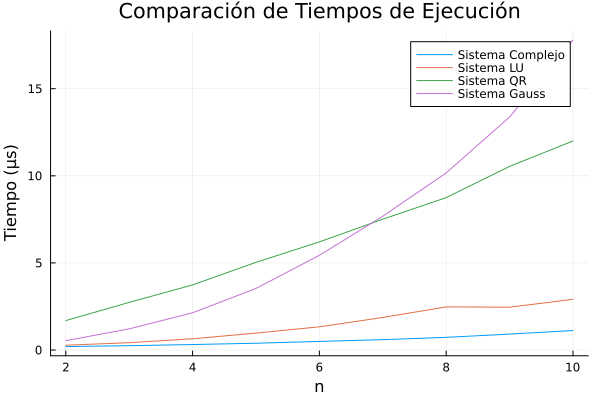

In [15]:
# Valores de n
n_values = 2:iteraciones

# Graficar los resultados
plot(n_values, tiempos_complejos, label="Sistema Complejo", legend=:topright, xlabel="n", ylabel="Tiempo (μs)", title="Comparación de Tiempos de Ejecución")
plot!(n_values, tiempos_LU, label="Sistema LU")
plot!(n_values, tiempos_QR, label="Sistema QR")
plot!(n_values, tiempos_Gauss, label="Sistema Gauss")

Podemos descartar a Gauss por ser el que peor tiempo de ejecucion tiene

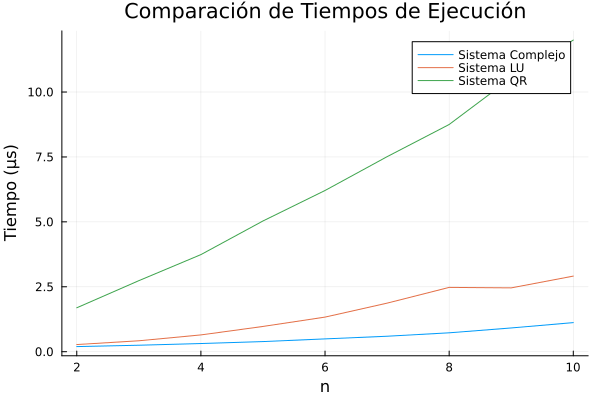

In [16]:
# Valores de n
n_values = 2:iteraciones

# Graficar los resultados
plot(n_values, tiempos_complejos, label="Sistema Complejo", legend=:topright, xlabel="n", ylabel="Tiempo (μs)", title="Comparación de Tiempos de Ejecución")
plot!(n_values, tiempos_LU, label="Sistema LU")
plot!(n_values, tiempos_QR, label="Sistema QR")

Esto nos permite ver de mejor forma el comportamiento de los algoritmos optimos